In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

In [2]:
class Node:
    node_count = 0
    all_nodes = []

    def __init__(self, mut_prob=0.0):
        self.id = Node.node_count
        Node.node_count += 1
        Node.all_nodes.append(self)

        self.parent = None
        self.children = []

        self.mutated = np.random.rand() < mut_prob
    
    def adopt(self, child):
        assert child not in self.children
        assert child.parent is None
        self.children.append(child)
        child.parent = self

class WrightFisher:
    def __init__(self, origin, n_pop, mut_prob=0.0):
        self.origin = origin
        self.generations = [[origin]]
        self.n_pop = n_pop
        self.mut_prob = mut_prob
    
    def next_generation(self):
        parents = np.random.choice(self.generations[-1], size=self.n_pop, replace=True)
        parents = sorted(parents, key=lambda x: x.id)
        children = [Node(mut_prob=self.mut_prob) for _ in range(self.n_pop)]
        for parent, child in zip(parents, children):
            parent.adopt(child)
        self.generations.append(children)

    def evolve(self, n_gen):
        for _ in range(n_gen):
            self.next_generation()

    def count_non_fixated_mutations(self, gen):
        mut_count = 0
        ancestors = self.generations[gen]
        while len(set(ancestors)) > 1:
            mut_count += sum(node.mutated for node in set(ancestors))
            ancestors = [node.parent for node in ancestors]
        return mut_count
    

In [3]:
n = 100
n_gen = 500
n_pop = n
mut_prob = 0.1

n_trajectories = 100

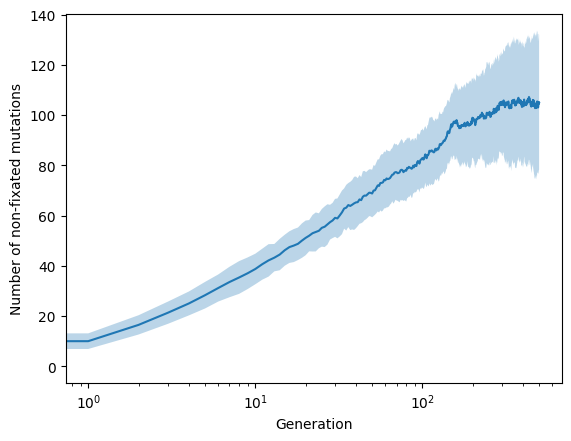

In [4]:
mut_counts = np.zeros((n_gen, n_trajectories))
for traj in range(n_trajectories):
    origin = Node()
    wf = WrightFisher(origin, n_pop, mut_prob)
    wf.evolve(n_gen)
    for gen in range(n_gen):
        mut_counts[gen, traj] = wf.count_non_fixated_mutations(gen)

mean_mut_counts = np.mean(mut_counts, axis=1)
std_mut_counts = np.std(mut_counts, axis=1)

plt.plot(mean_mut_counts)
plt.fill_between(range(n_gen), mean_mut_counts - std_mut_counts, mean_mut_counts + std_mut_counts, alpha=0.3)
plt.xlabel('Generation')
plt.ylabel('Number of non-fixated mutations')
plt.xscale('log')
plt.show()